In [60]:
## Importing the required Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Datasets

In [61]:
# loading data from leads_basic_details.csv 

df1 = pd.read_csv("E:\Masai Course(Data Anaytics)/Project/New folder/ed_tech details/leads_basic_details.csv")

# loading data from leads_demo_watched_details.csv 

df2 = pd.read_csv("E:\Masai Course(Data Anaytics)/Project/New folder/ed_tech details/leads_demo_watched_details.csv")

# loading data from leads_interaction_details.csv 

df3 = pd.read_csv("E:\Masai Course(Data Anaytics)/Project/New folder/ed_tech details/leads_interaction_details.csv")

# loading data from leads_reasons_for_no_interest.csv 

df4 = pd.read_csv("E:\Masai Course(Data Anaytics)/Project/New folder/ed_tech details/leads_reasons_for_no_interest.csv")

# loading data from sales_managers_assigned_leads_details.csv 

df5 = pd.read_csv("E:\Masai Course(Data Anaytics)/Project/New folder/ed_tech details/sales_managers_assigned_leads_details.csv")


### Data Cleaning and Handling

In [62]:
print('*** SHAPE OF DATASETS ***\n')
print('leads_basic_details: ', df1.shape)
print('leads_demo_watched_details', df2.shape)
print('leads_interaction_details', df3.shape)
print('leads_reasons_for_no_interest', df4.shape)
print('sales_managers_assigned_leads_details', df5.shape)

*** SHAPE OF DATASETS ***

leads_basic_details:  (360, 7)
leads_demo_watched_details (194, 4)
leads_interaction_details (2192, 6)
leads_reasons_for_no_interest (294, 4)
sales_managers_assigned_leads_details (360, 5)


In [63]:
print('*** DUPLICATES COUNT ***\n')
print('leads_basic_details: ', df1.duplicated().sum())
print('leads_demo_watched_details: ', df2.duplicated().sum())
print('leads_interaction_details: ', df3.duplicated().sum())
print('leads_reasons_for_no_interest: ', df4.duplicated().sum())
print('sales_managers_assigned_leads_details: ', df5.duplicated().sum())

*** DUPLICATES COUNT ***

leads_basic_details:  0
leads_demo_watched_details:  0
leads_interaction_details:  438
leads_reasons_for_no_interest:  0
sales_managers_assigned_leads_details:  0


In [64]:
df3.drop_duplicates(inplace=True)
print('leads_interaction_details: ', df3.duplicated().sum())

leads_interaction_details:  0


In [65]:
## To find Null values

print('*** NULL VALUE COUNT ***\n')

print('\nleads_basic_details:\n\n', df1.isnull().sum())
print('\nleads_demo_watched_details:\n\n', df2.isnull().sum())
print('\nleads_interaction_details:\n\n', df3.isnull().sum())
print('\nleads_reasons_for_no_interest:\n\n', df4.isnull().sum())
print('\nsales_managers_assigned_leads_details:\n\n', df5.isnull().sum())

*** NULL VALUE COUNT ***


leads_basic_details:

 lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

leads_demo_watched_details:

 lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

leads_interaction_details:

 jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

leads_reasons_for_no_interest:

 lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64

sales_managers_assigned_leads_details:

 snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64


### DataFrame - df1

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [67]:
df1.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


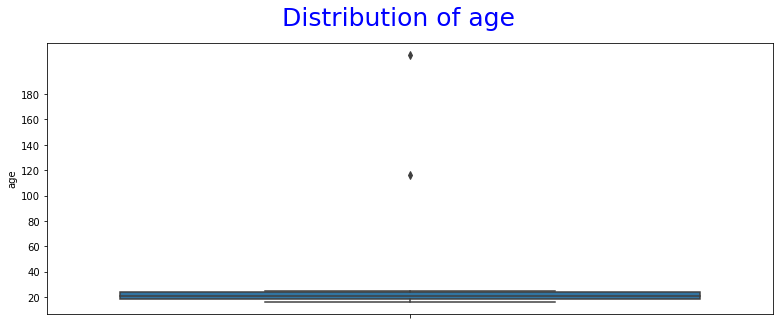

In [68]:
## Finding Outliners

plt.figure(figsize=(13,5))
plt.suptitle("Distribution of age", fontsize= 25, fontweight = 5, color = 'blue')
Range1 = np.arange(0,200,20)

label = ["{}".format(i) for i in Range1]

plt.yticks(Range1,label)
sns.boxplot(y=df1.age)

plt.show()

In [69]:
## Seperating values greater than 90 percentile as outliers and storing into a different dataset. 

df1_outlier = df1[df1.age>df1.age.quantile(0.90)]

## Displaying the outliers

df1_outlier

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [70]:
## Removing the outliers for df1 dataset

df1 = df1.drop([df1_outlier.index[0] , df1_outlier.index[1]])

In [71]:
df1.shape


(358, 7)

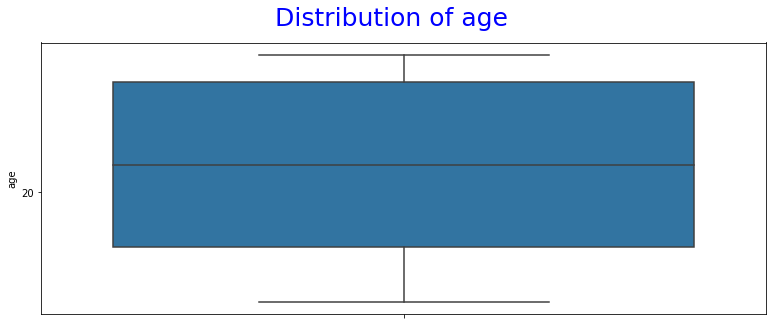

In [72]:
## Re-plotting age distribution after handling the outliers

plt.figure(figsize=(13,5))
plt.suptitle("Distribution of age", fontsize= 25, fontweight = 5, color = 'blue')
Range1 = np.arange(0,200,20)

label = ["{}".format(i) for i in Range1]

plt.yticks(Range1,label)
sns.boxplot(y=df1.age)

plt.show()

In [73]:
## gender wise value count

df1.gender.value_counts()

FEMALE    198
MALE      160
Name: gender, dtype: int64

In [74]:
df1.columns

Index(['lead_id', 'age', 'gender', 'current_city', 'current_education',
       'parent_occupation', 'lead_gen_source'],
      dtype='object')

In [75]:
df1.current_education.value_counts()

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

In [76]:
##  replace intermediate completed value name with intermediate

df1['current_education'].replace({'Intermediate Completed':'Intermediate'}, inplace=True)

### DataFrame - df2

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [78]:
df2.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


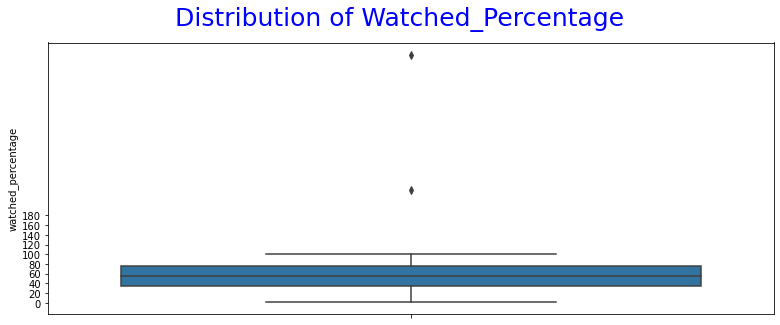

In [79]:
## Finding Outliners

plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Watched_Percentage", fontsize= 25, fontweight = 5, color = 'blue')

Range2 = np.arange(0,200,20)
label = ["{}".format(i) for i in Range2]

plt.yticks(Range2,label)
sns.boxplot(y=df2.watched_percentage)

plt.show()

In [80]:
## Identifying outliers whose watched percentage is beyond 100

df2_outlier = df2[df2.watched_percentage>100]

## Displaying the outliers

df2_outlier

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


In [81]:
# Removing the outliers from df2 dataset
df2 = df2.drop([df2_outlier.index[0] , df2_outlier.index[1]])


In [82]:
df2.shape

(192, 4)

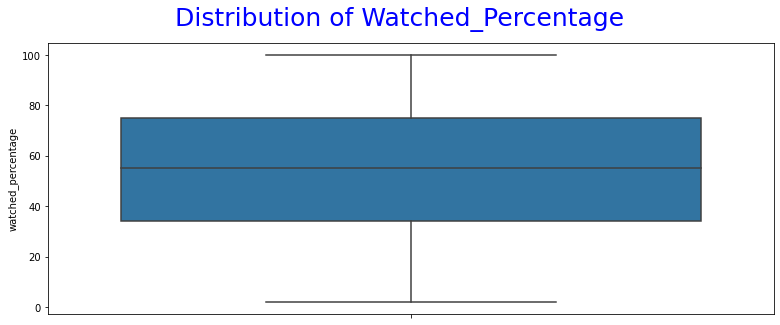

In [83]:
## Plotting watched percentage after handling outliers

plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Watched_Percentage", fontsize= 25, fontweight = 5, color = 'blue')

Range2 = np.arange(0,200,20)
label = ["{}".format(i) for i in Range2]

plt.yticks(Range2,label)
sns.boxplot(y=df2.watched_percentage)

plt.show()

In [84]:
df2 = df2.drop(['demo_watched_date'], axis=1)

In [85]:
df2

,lead_id,language,watched_percentage
0,USR1002,Telugu,42
1,USR1003,Telugu,81
2,USR1004,Telugu,35
3,USR1005,Hindi,38
4,USR1006,Hindi,54
...,...,...,...
189,USR1317,English,48
190,USR1318,English,83
191,USR1319,English,84
192,USR1343,English,68


In [89]:
df2['language'].unique()

array(['Telugu', 'Hindi', 'English'], dtype=object)

### DataFrame - df3 

In [90]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       1754 non-null   object
 1   lead_id         1754 non-null   object
 2   lead_stage      1754 non-null   object
 3   call_done_date  1754 non-null   object
 4   call_status     1754 non-null   object
 5   call_reason     1754 non-null   object
dtypes: object(6)
memory usage: 95.9+ KB


In [91]:
df3 = df3.drop(['call_done_date'], axis=1)
df3.head()

,jnr_sm_id,lead_id,lead_stage,call_status,call_reason
0,JNR1001MG,USR1001,lead,successful,lead_introduction
1,JNR1001MG,USR1001,lead,successful,demo_schedule
2,JNR1001MG,USR1002,lead,successful,lead_introduction
3,JNR1001MG,USR1002,lead,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,successful,post_demo_followup


In [92]:
## Identify Duplicate values

print(df3.duplicated().sum())

11


In [93]:
## drop duplicates

df3.drop_duplicates(inplace=True)

In [94]:
df3.lead_stage.value_counts()

lead             1196
consideration     254
awareness         229
conversion         64
Name: lead_stage, dtype: int64

In [95]:
## Renaming the stages according the the last stage each lead was in.

df3['lead_stage'].replace({'lead':'Lead Stage',
                           'lead-awareness': 'Awareness Stage',
                           'lead-awareness-consideration':'Consideration Stage', 
                           'lead-awareness-consideration-conversion':'Conversion Stage' }, inplace=True)

In [96]:
## Verifying count of leads in each stage

df3.lead_stage.value_counts()

Lead Stage       1196
consideration     254
awareness         229
conversion         64
Name: lead_stage, dtype: int64

### DataFrame - df4

In [97]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [98]:
# Replacing Null values with an empty string

df4['reasons_for_not_interested_in_demo'] = df4['reasons_for_not_interested_in_demo'].fillna('')
df4['reasons_for_not_interested_to_consider'] = df4['reasons_for_not_interested_to_consider'].fillna('')
df4['reasons_for_not_interested_to_convert'] = df4['reasons_for_not_interested_to_convert'].fillna('')

In [99]:
# Combine all the values in the existing columns and store them in the new column.

df4['Reason_for_not_interested'] = df4['reasons_for_not_interested_in_demo'] + df4['reasons_for_not_interested_to_consider'] + df4['reasons_for_not_interested_to_convert']

In [100]:
# Drop the redundant columns that are no longer required for analysis

df4 = df4.drop(['reasons_for_not_interested_in_demo','reasons_for_not_interested_to_consider', 'reasons_for_not_interested_to_convert'], axis=1)

In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    294 non-null    object
 1   Reason_for_not_interested  294 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [102]:
df4.Reason_for_not_interested.value_counts()

Can't afford                        95
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Cannot afford                        4
Name: Reason_for_not_interested, dtype: int64

In [103]:
df4['Reason_for_not_interested'].replace({"Can't afford":'Cannot afford'}, inplace=True)

In [104]:
df4

,lead_id,Reason_for_not_interested
0,USR1001,No time for student
1,USR1003,No time for student
2,USR1004,Wants offline classes
3,USR1005,Cannot afford
4,USR1006,Student not interested in domain
...,...,...
289,USR1356,Cannot afford
290,USR1357,Cannot afford
291,USR1358,Wants offline classes
292,USR1359,Will join in final year


### DataFrame - df5

In [105]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [106]:
df5 = df5.drop(['assigned_date'], axis=1)
df5.shape

(360, 4)

In [107]:
##  Removing the outliers identified in df1 and df2 from df5

df5 = df5.drop([df1_outlier.index[0] , df1_outlier.index[1], df2_outlier.index[0] , df2_outlier.index[1]])

In [108]:
print('***SHAPE OF DATASETS*** \n')
print('leads_basic_details: ', df1.shape)
print('leads_demo_watched_details', df2.shape)
print('leads_interaction_details', df3.shape)
print('leads_reasons_for_no_interest', df4.shape)
print('sales_managers_assigned_leads_details', df5.shape)

***SHAPE OF DATASETS*** 

leads_basic_details:  (358, 7)
leads_demo_watched_details (192, 3)
leads_interaction_details (1743, 5)
leads_reasons_for_no_interest (294, 2)
sales_managers_assigned_leads_details (356, 4)


In [109]:
## merging two datasets

L1 = pd.merge(df1,df3)
L1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1733
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            1734 non-null   object
 1   age                1734 non-null   int64 
 2   gender             1734 non-null   object
 3   current_city       1734 non-null   object
 4   current_education  1734 non-null   object
 5   parent_occupation  1734 non-null   object
 6   lead_gen_source    1734 non-null   object
 7   jnr_sm_id          1734 non-null   object
 8   lead_stage         1734 non-null   object
 9   call_status        1734 non-null   object
 10  call_reason        1734 non-null   object
dtypes: int64(1), object(10)
memory usage: 162.6+ KB


In [110]:
## merge L1 with df5

L2 = pd.merge(L1,df5)
L2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            1726 non-null   object
 1   age                1726 non-null   int64 
 2   gender             1726 non-null   object
 3   current_city       1726 non-null   object
 4   current_education  1726 non-null   object
 5   parent_occupation  1726 non-null   object
 6   lead_gen_source    1726 non-null   object
 7   jnr_sm_id          1726 non-null   object
 8   lead_stage         1726 non-null   object
 9   call_status        1726 non-null   object
 10  call_reason        1726 non-null   object
 11  snr_sm_id          1726 non-null   object
 12  cycle              1726 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 188.8+ KB


In [111]:
## merge L2 with df4

L3 = pd.merge(L2, df4, how = 'left', on='lead_id')
L3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    1726 non-null   object
 1   age                        1726 non-null   int64 
 2   gender                     1726 non-null   object
 3   current_city               1726 non-null   object
 4   current_education          1726 non-null   object
 5   parent_occupation          1726 non-null   object
 6   lead_gen_source            1726 non-null   object
 7   jnr_sm_id                  1726 non-null   object
 8   lead_stage                 1726 non-null   object
 9   call_status                1726 non-null   object
 10  call_reason                1726 non-null   object
 11  snr_sm_id                  1726 non-null   object
 12  cycle                      1726 non-null   int64 
 13  Reason_for_not_interested  1205 non-null   object
dtypes: int64

In [112]:
## fill null values

L3['Reason_for_not_interested'] = L3['Reason_for_not_interested'].fillna('Shown Interest')

In [113]:
L3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    1726 non-null   object
 1   age                        1726 non-null   int64 
 2   gender                     1726 non-null   object
 3   current_city               1726 non-null   object
 4   current_education          1726 non-null   object
 5   parent_occupation          1726 non-null   object
 6   lead_gen_source            1726 non-null   object
 7   jnr_sm_id                  1726 non-null   object
 8   lead_stage                 1726 non-null   object
 9   call_status                1726 non-null   object
 10  call_reason                1726 non-null   object
 11  snr_sm_id                  1726 non-null   object
 12  cycle                      1726 non-null   int64 
 13  Reason_for_not_interested  1726 non-null   object
dtypes: int64

In [114]:
## merge L3 with df2

L4 = pd.merge(L3,df2,how='left',on='lead_id')
L4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lead_id                    1726 non-null   object 
 1   age                        1726 non-null   int64  
 2   gender                     1726 non-null   object 
 3   current_city               1726 non-null   object 
 4   current_education          1726 non-null   object 
 5   parent_occupation          1726 non-null   object 
 6   lead_gen_source            1726 non-null   object 
 7   jnr_sm_id                  1726 non-null   object 
 8   lead_stage                 1726 non-null   object 
 9   call_status                1726 non-null   object 
 10  call_reason                1726 non-null   object 
 11  snr_sm_id                  1726 non-null   object 
 12  cycle                      1726 non-null   int64  
 13  Reason_for_not_interested  1726 non-null   objec

In [53]:
## fill null values

L4['language'] = L4['language'].fillna('Info Unavailable')
L4['watched_percentage'] = L4['watched_percentage'].fillna('0')

In [54]:
L4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    1726 non-null   object
 1   age                        1726 non-null   int64 
 2   gender                     1726 non-null   object
 3   current_city               1726 non-null   object
 4   current_education          1726 non-null   object
 5   parent_occupation          1726 non-null   object
 6   lead_gen_source            1726 non-null   object
 7   jnr_sm_id                  1726 non-null   object
 8   lead_stage                 1726 non-null   object
 9   call_status                1726 non-null   object
 10  call_reason                1726 non-null   object
 11  snr_sm_id                  1726 non-null   object
 12  cycle                      1726 non-null   int64 
 13  Reason_for_not_interested  1726 non-null   object
 14  language

In [55]:
## check duplicate values

L4.duplicated().sum()

0

In [56]:
L4['Lead_Status'] = np.where(L4['lead_stage'] == 'Conversion Stage', 'Converted Lead', 'Yet to convert Lead')

In [57]:
L4

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_status,call_reason,snr_sm_id,cycle,Reason_for_not_interested,language,watched_percentage,Lead_Status
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,Lead Stage,successful,lead_introduction,SNR501MG,1,No time for student,Info Unavailable,0,Yet to convert Lead
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,Lead Stage,successful,demo_schedule,SNR501MG,1,No time for student,Info Unavailable,0,Yet to convert Lead
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,Lead Stage,successful,lead_introduction,SNR501MG,1,Shown Interest,Telugu,42.0,Yet to convert Lead
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,Lead Stage,successful,demo_schedule,SNR501MG,1,Shown Interest,Telugu,42.0,Yet to convert Lead
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,successful,post_demo_followup,SNR501MG,1,Shown Interest,Telugu,42.0,Yet to convert Lead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals,JNR1001MG,Lead Stage,unsuccessful,lead_introduction,SNR501MG,4,Cannot afford,Info Unavailable,0,Yet to convert Lead
1722,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website,JNR1001MG,Lead Stage,unsuccessful,lead_introduction,SNR501MG,1,Cannot afford,Info Unavailable,0,Yet to convert Lead
1723,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO,JNR1001MG,Lead Stage,unsuccessful,lead_introduction,SNR501MG,2,Wants offline classes,Info Unavailable,0,Yet to convert Lead
1724,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing,JNR1001MG,Lead Stage,unsuccessful,lead_introduction,SNR501MG,3,Will join in final year,Info Unavailable,0,Yet to convert Lead


In [58]:
## Converting dataframe to csv file

L4.to_csv('L4.csv', index=False)

In [117]:
merged_leads_demo = pd.merge(df2, df1, how='inner', on = 'lead_id')
merged_leads_demo 

,lead_id,language,watched_percentage,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1002,Telugu,42,20,MALE,Bengaluru,B.Tech,Business,user_referrals
1,USR1003,Telugu,81,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
2,USR1004,Telugu,35,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
3,USR1005,Hindi,38,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
4,USR1006,Hindi,54,16,MALE,Kochi,Intermediate,Doctor,user_referrals
...,...,...,...,...,...,...,...,...,...
186,USR1317,English,48,24,MALE,Mumbai,Looking for Job,Lawyer,social_media
187,USR1318,English,83,21,MALE,Mumbai,Degree,IT Employee,email_marketing
188,USR1319,English,84,22,FEMALE,Bengaluru,Looking for Job,Government Employee,email_marketing
189,USR1343,English,68,24,FEMALE,Kochi,Looking for Job,IT Employee,social_media


In [116]:
merged_leads_demo.groupby(['language', 'current_city']).size()

language  current_city 
English   Bengaluru        22
          Chennai          17
          Hyderabad        20
          Kochi            19
          Mumbai           11
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

In [124]:
merged_interaction_demo.to_csv('merged_interaction_demo.csv', index=False)

In [118]:
merged_interaction_demo = pd.merge(df2, df3, how='inner', on = 'lead_id')
merged_interaction_demo

,lead_id,language,watched_percentage,jnr_sm_id,lead_stage,call_status,call_reason
0,USR1002,Telugu,42,JNR1001MG,Lead Stage,successful,lead_introduction
1,USR1002,Telugu,42,JNR1001MG,Lead Stage,successful,demo_schedule
2,USR1002,Telugu,42,JNR1001MG,awareness,successful,post_demo_followup
3,USR1002,Telugu,42,JNR1001MG,awareness,successful,followup_for_consideration
4,USR1002,Telugu,42,JNR1001MG,consideration,successful,interested_for_conversion
...,...,...,...,...,...,...,...
1227,USR1348,English,72,JNR1012MG,Lead Stage,successful,demo_not_attended
1228,USR1348,English,72,JNR1012MG,awareness,successful,post_demo_followup
1229,USR1348,English,72,JNR1012MG,awareness,successful,followup_for_consideration
1230,USR1348,English,72,JNR1012MG,consideration,successful,followup_for_conversion


In [119]:
merged_interaction_demo.groupby([ 'call_status','call_reason']).size()

call_status   call_reason               
successful    demo_not_attended             155
              demo_schedule                 192
              followup_for_consideration     30
              followup_for_conversion       101
              interested_for_conversion     113
              lead_introduction             192
              post_demo_followup            192
              successful_conversion          63
unsuccessful  demo_not_attended              45
              demo_schedule                  15
              followup_for_consideration      5
              followup_for_conversion        19
              interested_for_conversion      18
              lead_introduction              92
dtype: int64

In [120]:
df4.describe()

,lead_id,Reason_for_not_interested
count,294,294
unique,294,5
top,USR1001,Cannot afford
freq,1,99


In [123]:
L4['lead_stage'].unique()

4